In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('../readmaroc')

from maroc_data_new_tboard import MarocData

from functools import partial
from collections import Counter
from scipy.stats import norm

input_dat = '../data/Run000144856.dat'
marocdata = MarocData(input_dat)

y_offset = [12000, 10000, 8000, 4000, 2000]

In [2]:
marocdata.check_clean_ts()

Timestamps of board 3 have been fixed


In [3]:
marocdata.fix_p1(debug=False)

In [4]:
len(marocdata.get_board(1).clean_timestamps.values())

1201

In [5]:
marocdata.get_board(1).get_event(1224).TS

2191281569

In [6]:
marocdata.get_board(1).get_event(1224).TS_norm

2121973405

In [7]:
marocdata.get_board(18).clean_timestamps

{0: 2,
 1941449: 3,
 2652282: 4,
 3652904: 5,
 5054754: 6,
 5061685: 7,
 5724449: 8,
 8929881: 9,
 11136136: 10,
 12944076: 11,
 18190929: 12,
 18549596: 13,
 18880265: 14,
 19416919: 15,
 20711179: 16,
 21353460: 17,
 25222473: 18,
 25411721: 19,
 26095667: 20,
 26644601: 21,
 26762239: 22,
 29676078: 23,
 29684704: 24,
 29821773: 25,
 29902441: 26,
 30038619: 27,
 31688077: 28,
 35486404: 29,
 37336316: 30,
 37956577: 31,
 39948040: 32,
 40019841: 33,
 41591136: 34,
 42675427: 35,
 45748016: 36,
 46892532: 37,
 47050631: 38,
 47576685: 39,
 48020115: 40,
 48535679: 41,
 61449899: 42,
 61991309: 43,
 66094569: 44,
 67874086: 45,
 68217883: 46,
 70953137: 47,
 76002700: 48,
 77903455: 49,
 79114238: 50,
 79730089: 51,
 86234000: 52,
 87591344: 53,
 87852504: 54,
 88419391: 55,
 95004208: 56,
 98554301: 57,
 99066367: 58,
 99195335: 59,
 99455254: 60,
 100936535: 61,
 103709743: 62,
 104323820: 63,
 104817827: 64,
 105637365: 65,
 107368045: 66,
 108501938: 67,
 108562107: 68,
 10862706

In [8]:
marocdata.get_board(18).get_event(1185).TS_norm

2121973405

In [9]:
for board in marocdata.active_boards:
    print(marocdata.get_board(board).reference_event.evt_id)

41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
2
2
2
2
2
2
2
2
2
2
2
2
2


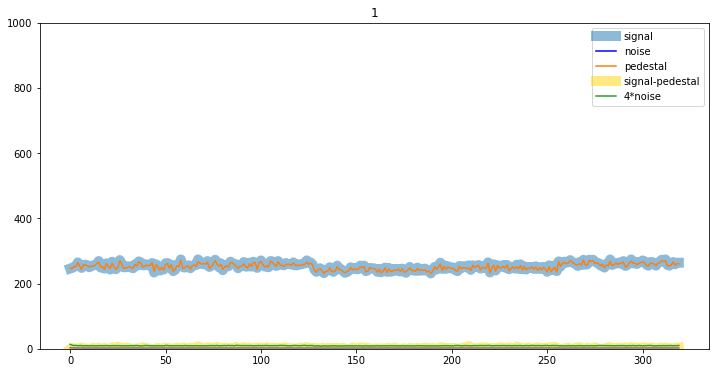

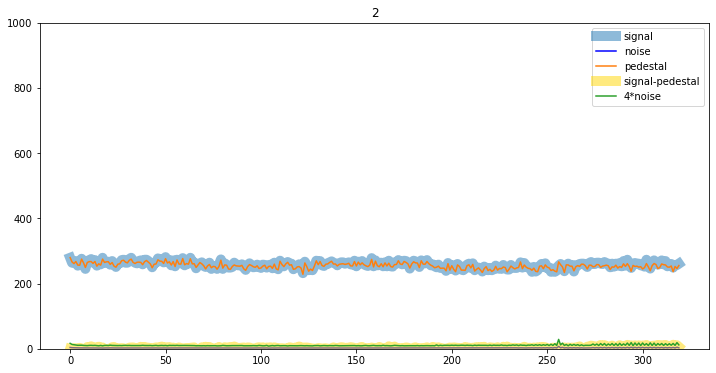

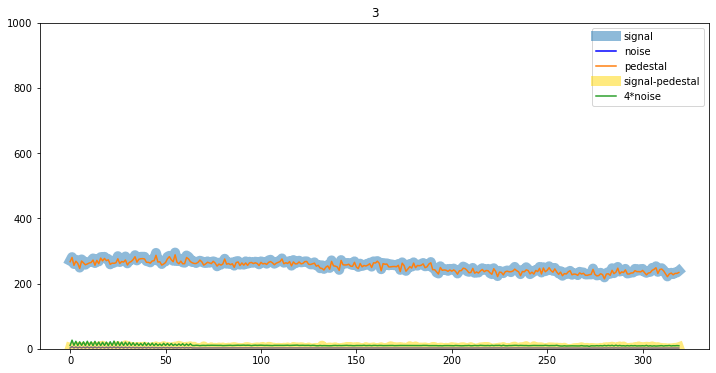

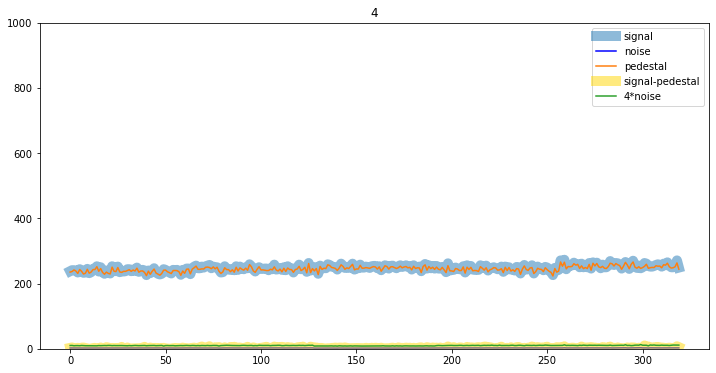

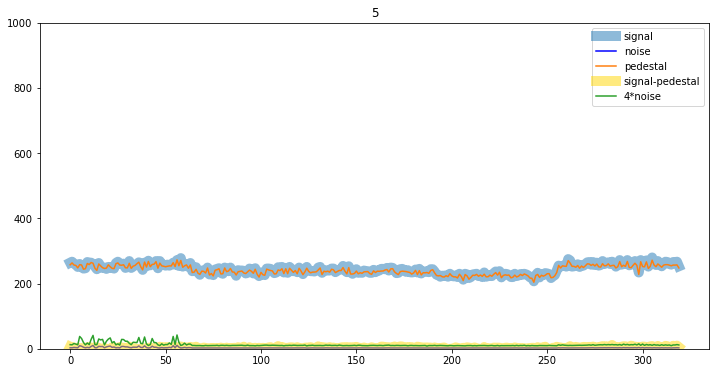

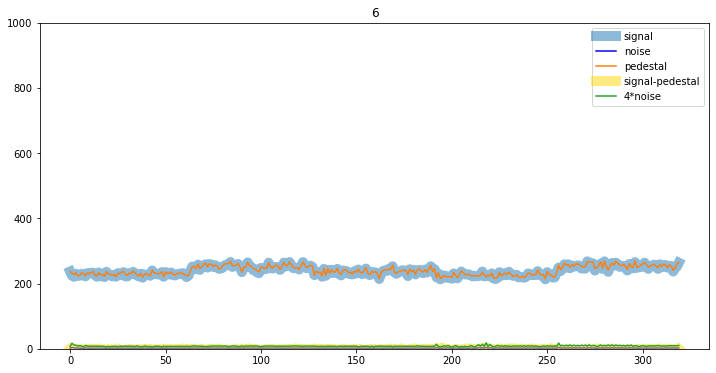

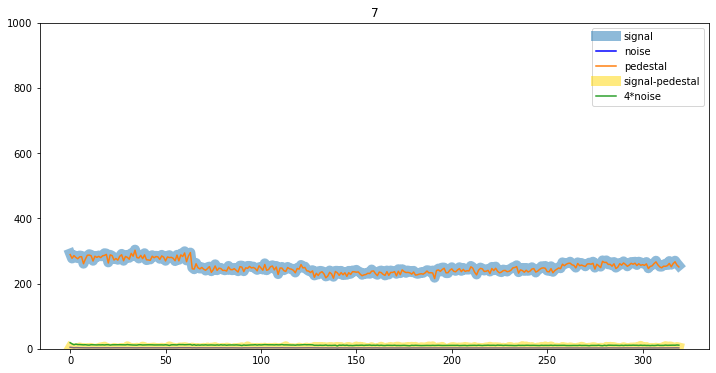

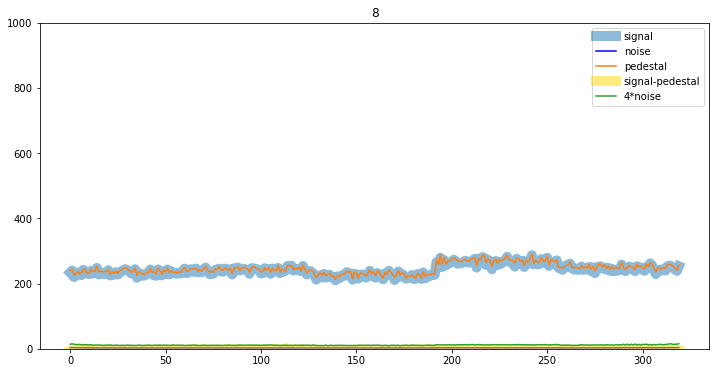

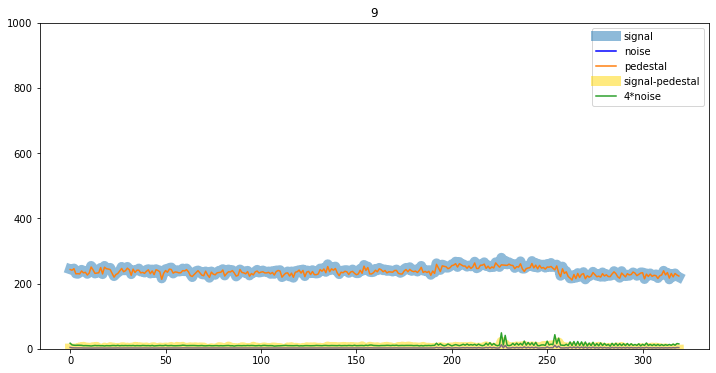

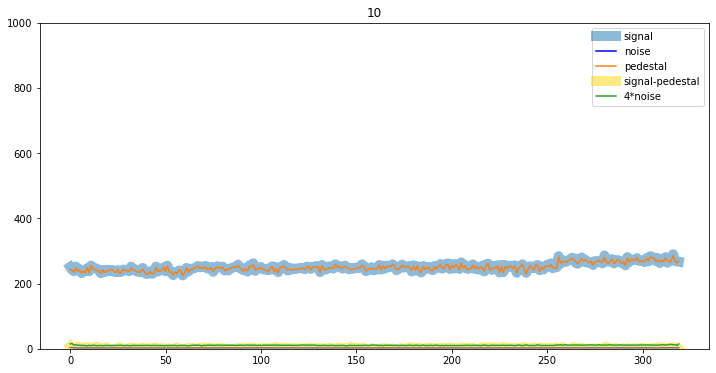

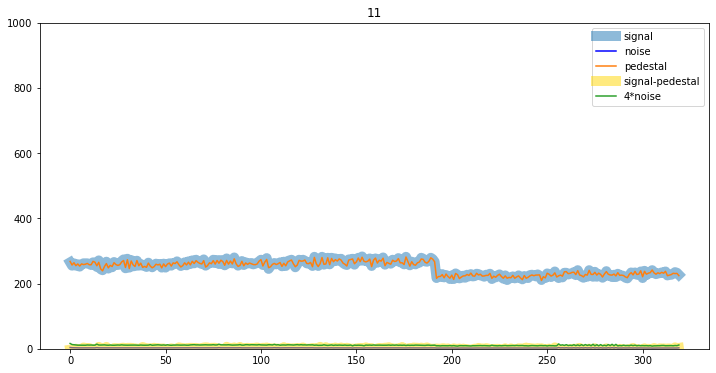

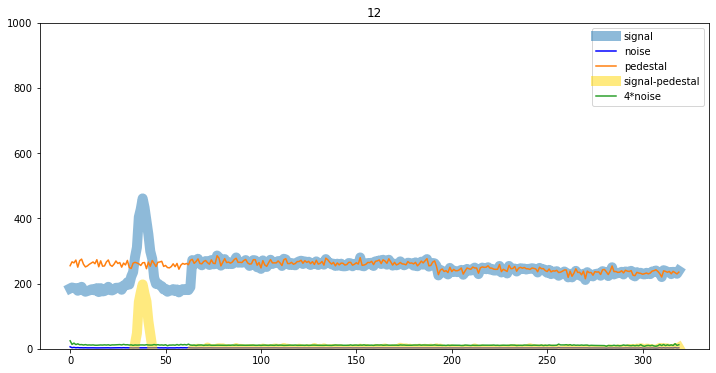

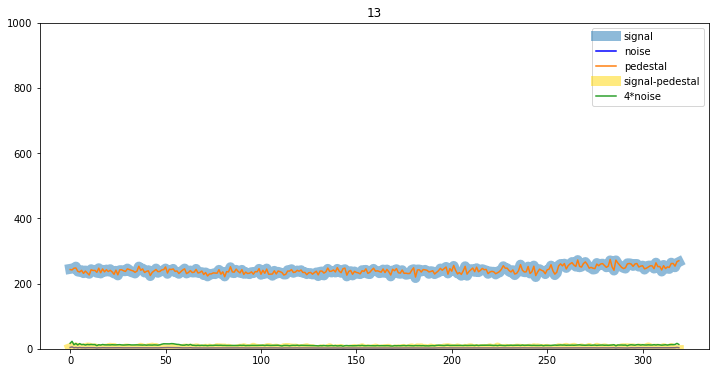

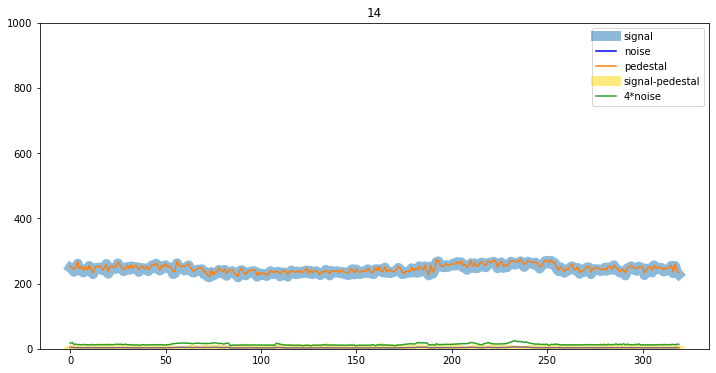

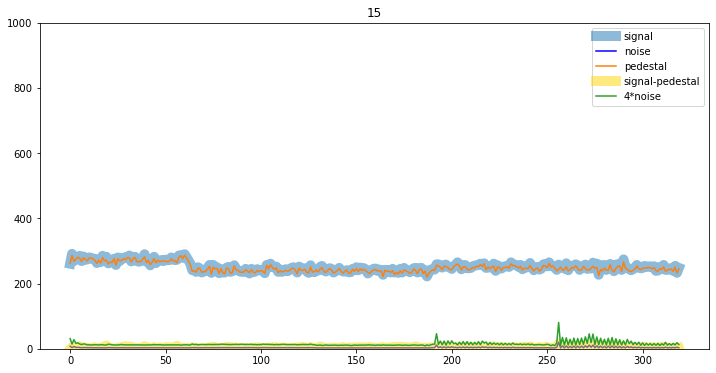

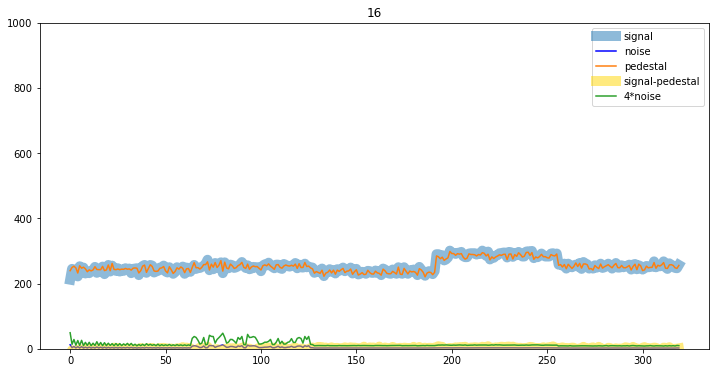

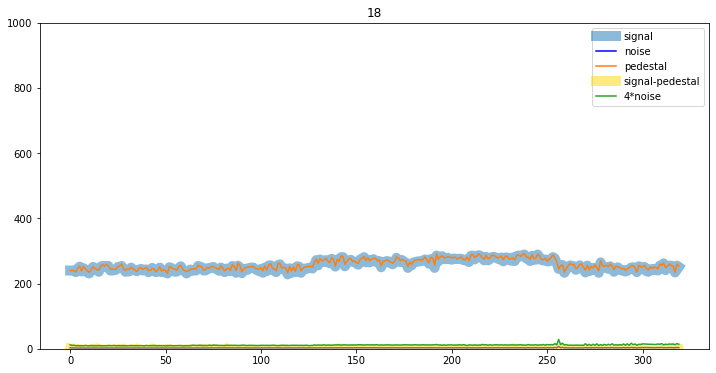

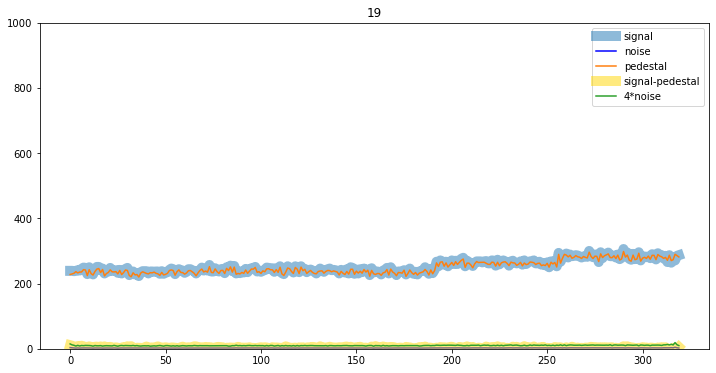

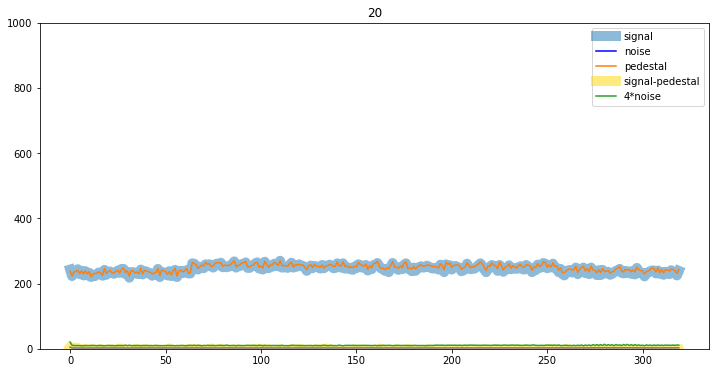

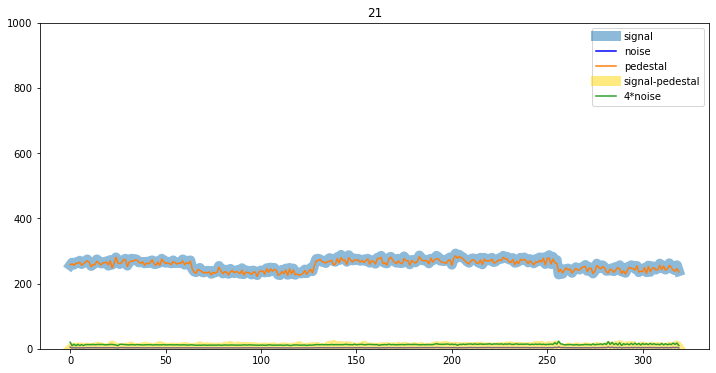

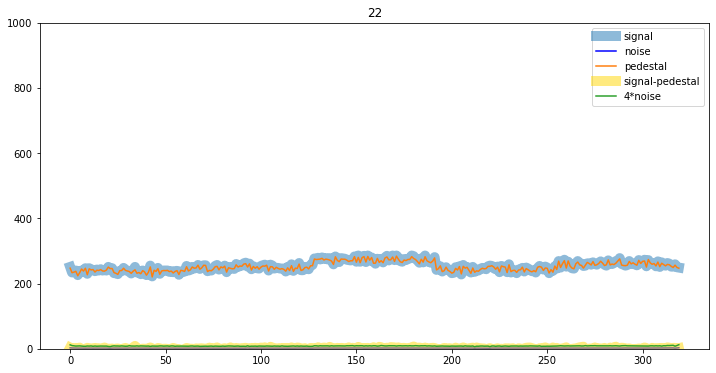

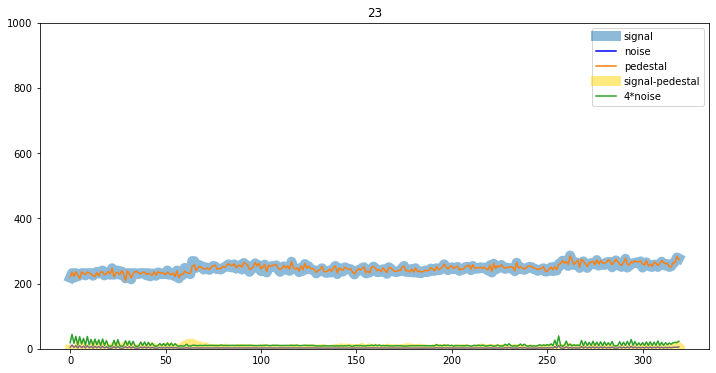

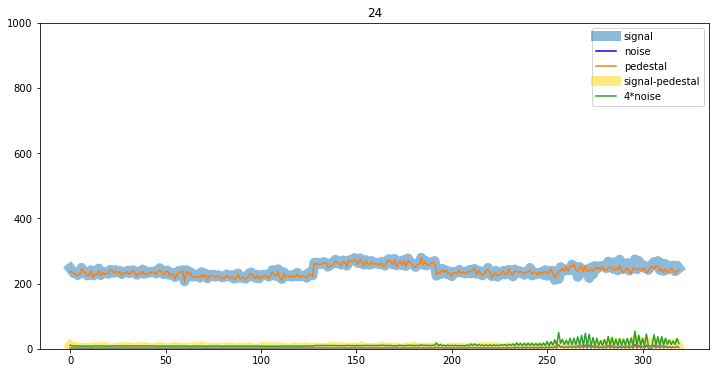

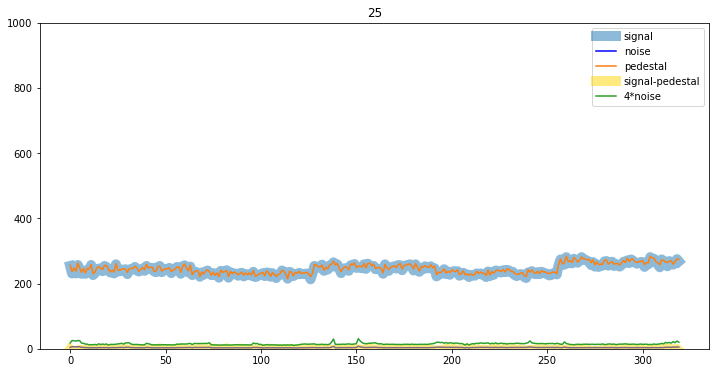

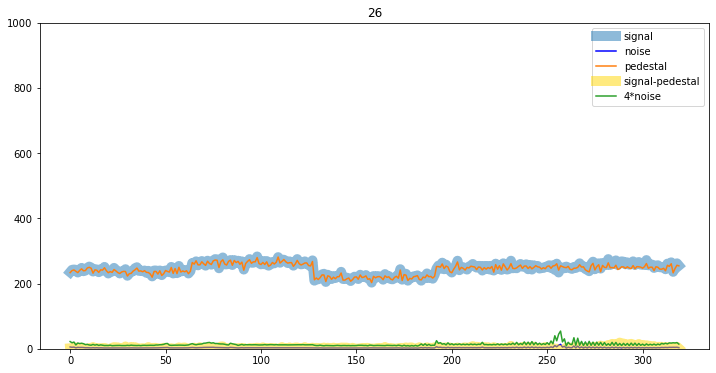

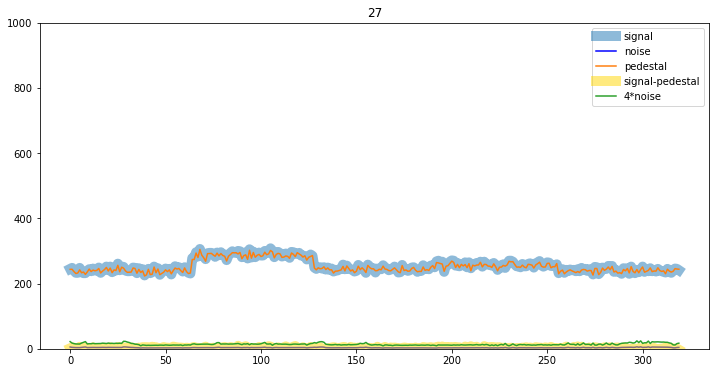

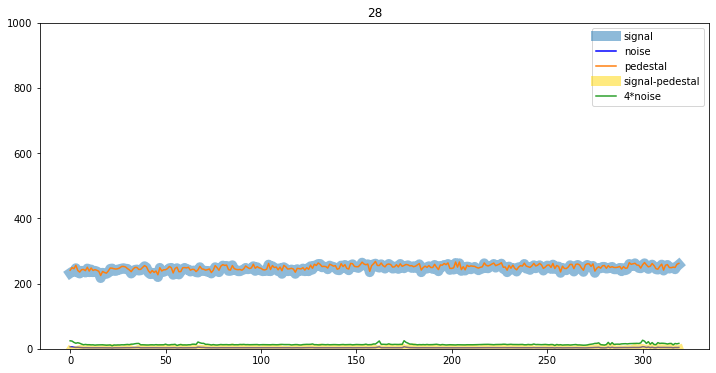

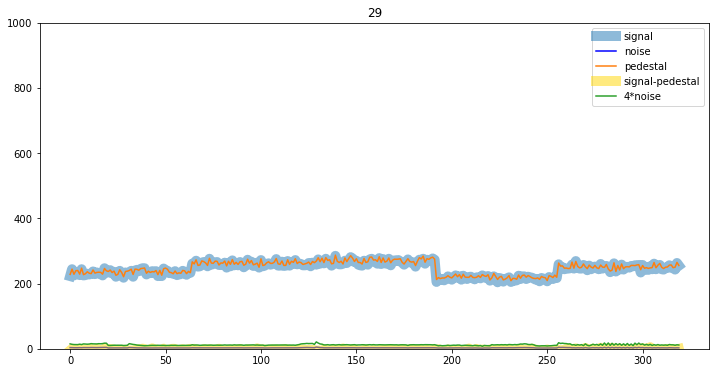

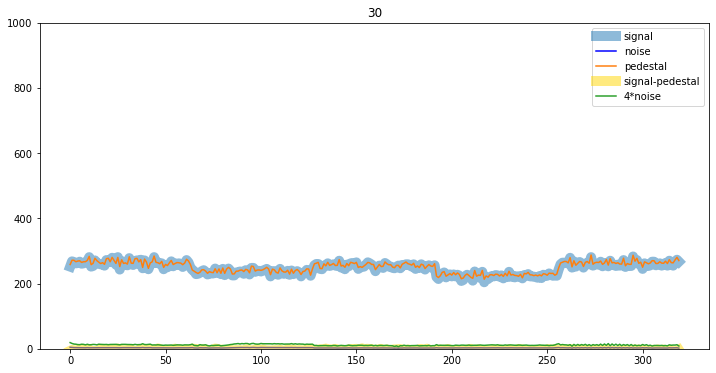

In [52]:
n=4
for board in marocdata.active_boards:
    plt.figure(figsize=(12,6))
    pedestal = marocdata.get_board(board).avg_data
    signal = marocdata.get_board(board).signals[1183+marocdata.get_board(board).reference_event.evt_id]
    plt.plot(np.arange(320), signal, label='signal', linewidth=10, alpha=.5)
    plt.plot(np.arange(320), marocdata.get_board(board).noise, label='noise', c='blue')
    plt.plot(np.arange(320), pedestal,label='pedestal')
    plt.plot(np.arange(320), signal-pedestal,label='signal-pedestal', c='gold', linewidth=10, alpha=.5)
    plt.plot(np.arange(320), n*marocdata.get_board(board).noise, label='{}*noise'.format(n))
    plt.title(board)
    plt.ylim(0,1000)
    plt.legend()
    plt.show()